## Homework #3. Crowdsourcing tools review
#### Author: `Mostova Maria`
#### Total time spent on h/w (in minutes): `591`

import pandas as pd

In [2]:
import pandas as pd

DIALOGS_MERGED_DATA_PATH = "D:/pythonchik/progapy/proj/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/pythonchik/progapy/proj/merged_data/dialogs_users_all.csv"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH, low_memory=False)

## Task 2.1
## Messages data analysis

In [4]:
df.head(10)

id                       date from_id  \
0  1796  2022-02-15 12:40:13+00:00     NaN   
1  1795  2022-02-15 11:00:21+00:00     NaN   
2  1794  2022-02-14 16:24:00+00:00     NaN   
3  1793  2022-02-14 08:53:53+00:00     NaN   
4  1792  2022-02-10 13:00:04+00:00     NaN   
5  1791  2022-02-10 11:00:43+00:00     NaN   
6  1790  2022-02-10 07:00:03+00:00     NaN   
7  1789  2022-02-09 14:02:21+00:00     NaN   
8  1788  2022-02-09 13:00:04+00:00     NaN   
9  1787  2022-02-09 11:27:41+00:00     NaN   

                                to_id  \
0  PeerChannel(channel_id=1064125916)   
1  PeerChannel(channel_id=1064125916)   
2  PeerChannel(channel_id=1064125916)   
3  PeerChannel(channel_id=1064125916)   
4  PeerChannel(channel_id=1064125916)   
5  PeerChannel(channel_id=1064125916)   
6  PeerChannel(channel_id=1064125916)   
7  PeerChannel(channel_id=1064125916)   
8  PeerChannel(channel_id=1064125916)   
9  PeerChannel(channel_id=1064125916)   

                                            fwd_from  \
0  MessageFwdHeader(date=datetime.datetime(2022, ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                             message   type  duration  \
0  Друзі, ми збільшили суму щомісячних донейтів б...  photo       NaN   
1  🔍 Вакансії для HR-фахівців у Дніпрі та віддале...   text       NaN   
2  🇺🇦 DOU запускає антиросійський флешмоб #ITsupp...   text       NaN   
3  Рейтинг мов програмування 2022. C# обійшов Jav...  photo       NaN   
4  16 березня — Безкоштовне стажування з програму...   text       NaN   
5  🔥 Гаряча вакансія DOU\n\nCustomer Support Spec...  photo       NaN   
6  23 лютого — Майстер-клас «Який він, SMM у 2022...   text       NaN   
7  🔍 Вакансії для Node.js девелоперів у Дніпрі та...   text       NaN   
8  23 февраля — Индивидуальная стажировка на пози...   text       NaN   
9  Свічнулись в IT, підвищили зарплату на 50% та ...  photo       NaN   

       dialog_id  
0 -1001064125916  
1 -1001064125916  
2 -1001064125916  
3 -1001064125916  
4 -1001064125916  
5 -1001064125916  
6 -1001064125916  
7 -1001064125916  
8 -1001064125916  
9 -1001064125916

In [5]:
df.shape

(476575, 9)

In [6]:
min(df["date"]),max(df["date"])

('2017-05-27 16:16:33+00:00', '2022-02-16 09:46:45+00:00')

In [7]:
df.groupby(["type"])["type"].count()

type
photo       91952
sticker     12265
text       332211
video       36071
voice        4076
Name: type, dtype: int64

In [8]:
df.groupby(["type"])["duration"].sum()

type
photo           0.0
sticker         0.0
text            0.0
video      879635.0
voice      116131.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [9]:
my_id = '463034736'

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [10]:
df.loc[324751]

id                                                      757604
date                                 2021-05-24 12:25:38+00:00
from_id                                                    NaN
to_id                                                463034736
fwd_from                                                   NaN
message      И вот я купил сегодня мультитул для велосипеда...
type                                                      text
duration                                                   NaN
dialog_id                                            428330492
Name: 324751, dtype: object

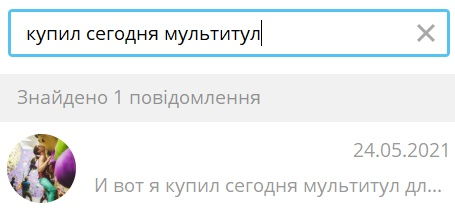

As we can see, this is the only message in my Telegram with such text.

Same with two other messages:

In [11]:
df.loc[262968]

id                                         3926
date                  2020-09-27 23:13:57+00:00
from_id             PeerUser(user_id=419467462)
to_id        PeerChannel(channel_id=1481887487)
fwd_from                                    NaN
message                 це мужицька тусовка да?
type                                       text
duration                                    NaN
dialog_id                        -1001481887487
Name: 262968, dtype: object

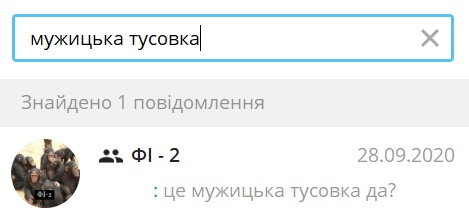

In [12]:
df.loc[326817]

id                                753788
date           2021-05-16 19:45:45+00:00
from_id      PeerUser(user_id=463034736)
to_id                          428330492
fwd_from                             NaN
message                   жуткий монолог
type                                text
duration                             NaN
dialog_id                      428330492
Name: 326817, dtype: object

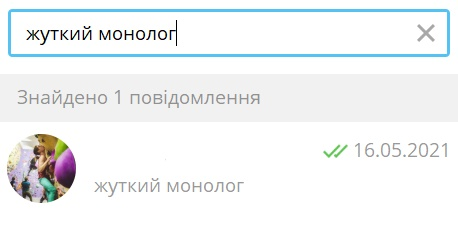

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [16]:
needed = df[(df['type'] == 'voice') & (df['from_id'] == 'PeerUser(user_id='+str(my_id)+')')]
needed.loc[needed['duration'].idxmax()]

id                                391472
date           2019-11-05 18:00:49+00:00
from_id      PeerUser(user_id=463034736)
to_id                          477527480
fwd_from                             NaN
message                              NaN
type                               voice
duration                           365.0
dialog_id                      477527480
Name: 348394, dtype: object

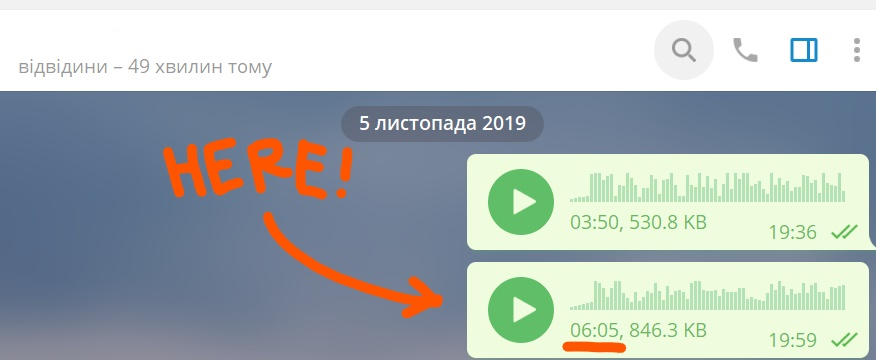

Turns out it was a really tough day.

4. Calculate numbers of send and received(s&r) messages.

In [117]:
print('Sent messages:', len(df[df['from_id'] == 'PeerUser(user_id='+str(my_id)+')']))
print('Recieved messages:', len(df[df['to_id'] == str(my_id)]))

Sent messages: 96226
Recieved messages: 103330


5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

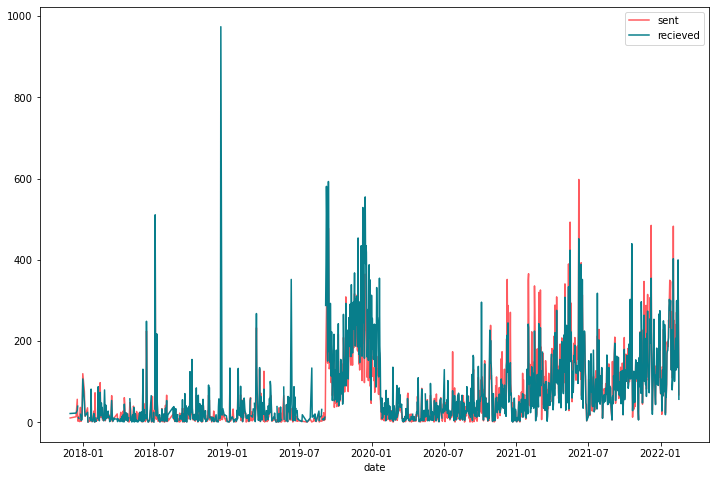

In [137]:
sent = df.copy()
sent = sent[sent['from_id'] == 'PeerUser(user_id='+str(my_id)+')']
sent["date"] = pd.to_datetime(sent["date"]).dt.date

recieved = df.copy()
recieved = recieved[recieved['to_id'] == str(my_id)]
recieved["date"] = pd.to_datetime(recieved["date"]).dt.date

s_and_r = pd.DataFrame()
s_and_r['sent'] = sent.groupby('date').size()
s_and_r['recieved'] = recieved.groupby('date').size()

import matplotlib.pyplot as plt

ax = plt.gca()
plt.rcParams['figure.figsize'] = [12, 8]

s_and_r.plot(kind='line',y='sent', color='#ff5a5f', ax=ax)
s_and_r.plot(kind='line',y='recieved', color='#087e8b', ax=ax)
plt.show()

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

Text(0.5, 1.0, 'sticker')

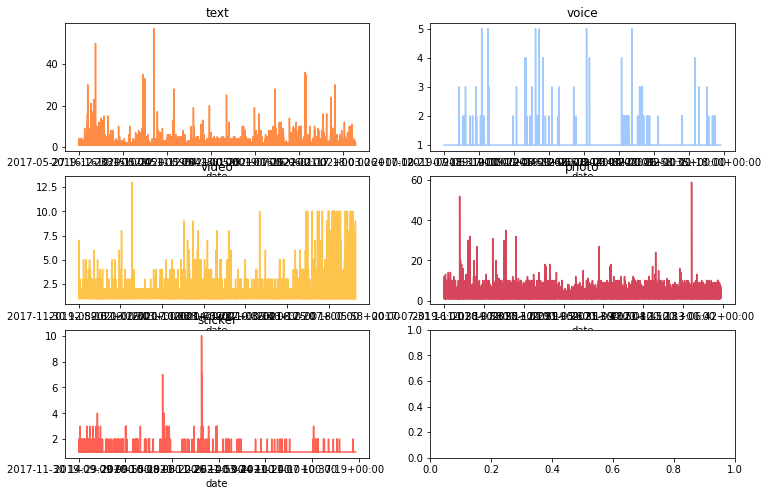

In [149]:
all_types = df[['date','type']].copy()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

all_types[all_types["type"]=="text"].groupby(['date']).count().plot(ax=axes[0,0],legend=False,color='#fe8c46'); axes[0,0].set_title('text')
all_types[all_types["type"]=="voice"].groupby(['date']).count().plot(ax=axes[0,1],legend=False,color='#a1c9fd'); axes[0,1].set_title('voice')
all_types[all_types["type"]=="video"].groupby(['date']).count().plot(ax=axes[1,0],legend=False,color='#fec34b'); axes[1,0].set_title('video')
all_types[all_types["type"]=="photo"].groupby(['date']).count().plot(ax=axes[1,1],legend=False,color='#d5465c'); axes[1,1].set_title('photo')
all_types[all_types["type"]=="sticker"].groupby(['date']).count().plot(ax=axes[2,0],legend=False,color='#fe6053'); axes[2,0].set_title('sticker')

At some point I got something really weird, like this.
I've already found out why it was showing me graphs like this, but it's still pretty interesting:

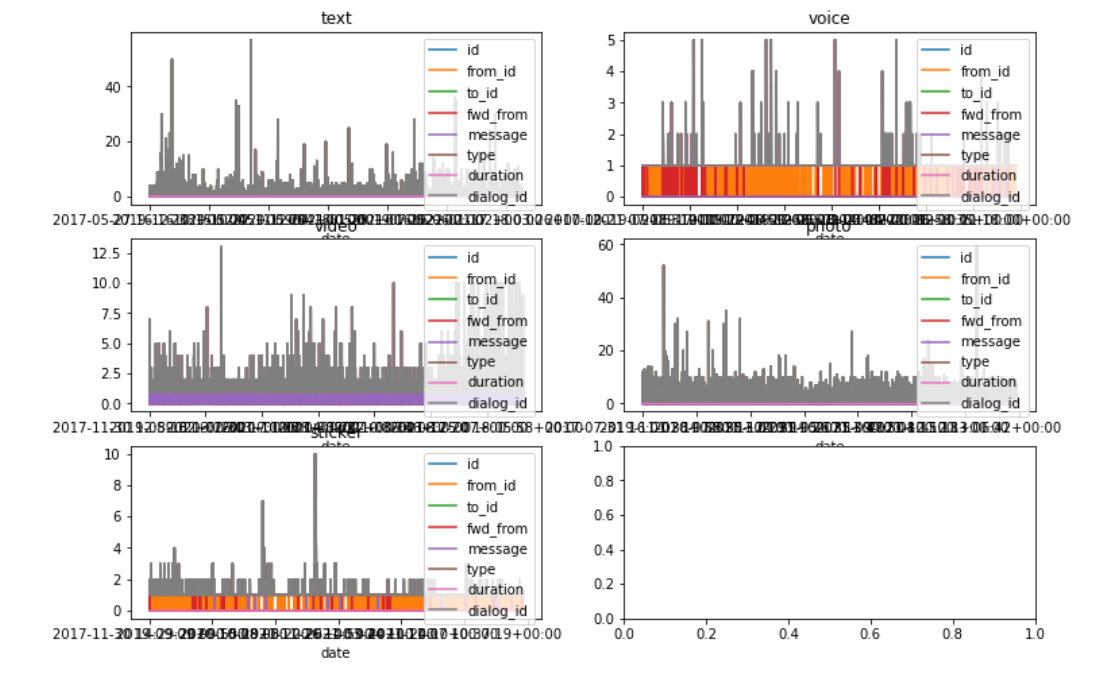

<AxesSubplot:ylabel='type'>

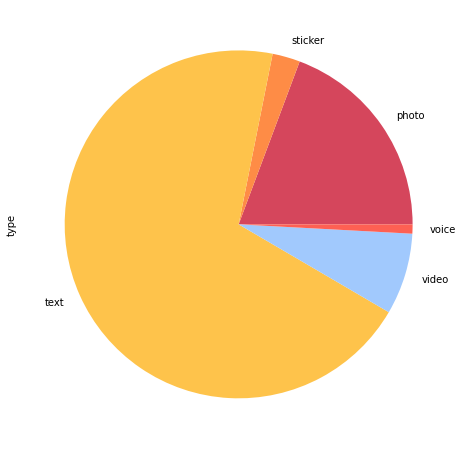

In [155]:
df.groupby(["type"])["type"].count().plot.pie(colors=['#d5465c','#fe8c46','#fec34b','#a1c9fd','#fe6053'])

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [169]:
sent_group_by = sent.groupby('to_id').size().reset_index(name='quantity')
sent_group_by['to_id'] = sent_group_by['to_id'].astype(str)
df_meta['dialog_id'] = df_meta['dialog_id'].astype(str)
needed = pd.merge(sent_group_by, df_meta, how='inner', left_on='to_id', right_on='dialog_id')

needed = needed.nlargest(10, "quantity")
needed[['name', 'quantity']]

name  quantity
7             наум☀️     27643
15    Таис Буговаров     21061
14             Masha     14172
11           братик🥺     10284
10           ольона💚      6864
16  ма́рия гапоненко      4353
13       Женя Кулиба      1148
2           rogallik       943
8       KMAScheduler       495
17    сестрица настя       445

8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [156]:
recieved_group_by = recieved.groupby('dialog_id').size().reset_index(name='quantity')
needed = pd.merge(recieved_group_by, df_meta, how='inner', left_on='dialog_id', right_on='dialog_id')

needed = needed.nlargest(10, "quantity")
needed[['name','quantity']]

name  quantity
11             Таис Буговаров     27235
3                      наум☀️     24487
8                     братик🥺     12597
10                      Masha      9341
7                     ольона💚      7573
5                        маша      6378
12           ма́рия гапоненко      2916
14                   rogallik      1133
6   LyBot – YouTube Music Bot       951
9                 Женя Кулиба       883

## Task 2.2
## Dialogs data analysis

In [59]:
df_meta.shape

(466, 4)

In [60]:
df_meta.head(10)

dialog_id             name     type  \
0 -1001174214342  маша в квадрате  Channel   
1 -1001174214342  маша в квадрате  Channel   
2 -1001260680685      Примати20х2    Group   
3 -1001260680685      Примати20х2    Group   
4 -1001260680685      Примати20х2    Group   
5 -1001260680685      Примати20х2    Group   
6 -1001260680685      Примати20х2    Group   
7 -1001260680685      Примати20х2    Group   
8 -1001260680685      Примати20х2    Group   
9 -1001260680685      Примати20х2    Group   

                                               users  
0  {'user_id': 463034736, 'first_name': 'маша', '...  
1  {'user_id': 497519466, 'first_name': 'братик🥺'...  
2  {'user_id': 633201121, 'first_name': 'ARINA', ...  
3  {'user_id': 1379932460, 'first_name': 'Petro.m...  
4  {'user_id': 544701196, 'first_name': 'Ярослав'...  
5  {'user_id': 470773767, 'first_name': 'Kate', '...  
6  {'user_id': 564960030, 'first_name': 'Анастаси...  
7  {'user_id': 459802765, 'first_name': 'Yaryna',...  
8  {'user_id': 716096216, 'first_name': 'ark', 'l...  
9  {'user_id': 5005476282, 'first_name': 'віка', ...

In [61]:
df_meta.groupby(["type"])["type"].count()

type
Channel             2
Group             445
Private dialog     19
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [118]:
css_id = -1001787503050
css_df = df_meta[df_meta['dialog_id'] == css_id]

users = []

print('ID of our group:', css_id)
css_df['users']

ID of our group: -1001787503050


248    {'user_id': 331192040, 'first_name': 'Andrew',...
249    {'user_id': 332402450, 'first_name': 'Александ...
250    {'user_id': 564960030, 'first_name': 'Анастаси...
251    {'user_id': 687038668, 'first_name': 'Aleksand...
252    {'user_id': 459802765, 'first_name': 'Yaryna',...
253    {'user_id': 544639169, 'first_name': 'natasha'...
254    {'user_id': 395158213, 'first_name': '∆аша', '...
255    {'user_id': 319498185, 'first_name': 'anhelina...
256    {'user_id': 463034736, 'first_name': 'маша', '...
257    {'user_id': 544701196, 'first_name': 'Ярослав'...
258    {'user_id': 371105962, 'first_name': 'Tim', 'l...
259    {'user_id': 387335969, 'first_name': 'Олександ...
260    {'user_id': 372551595, 'first_name': 'Влад', '...
261    {'user_id': 497713871, 'first_name': 'Богдан',...
262    {'user_id': 629737234, 'first_name': 'Egor', '...
263    {'user_id': 1610556588, 'first_name': 'Олег', ...
264    {'user_id': 716096216, 'first_name': 'ark', 'l...
265    {'user_id': 470773767, '

2. Draw distribution of group sizes.

Text(0, 0.5, 'Number of groups')

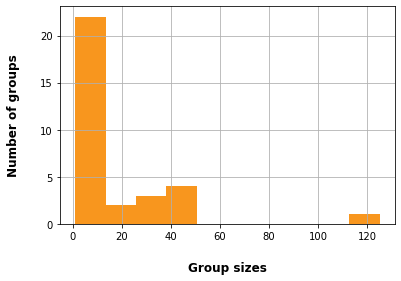

In [91]:
all_groups = df_meta.copy()
all_groups = all_groups.groupby(['dialog_id', 'name']).size().reset_index(name='size')

diagram = all_groups['size'].hist(color='#f8961e')
diagram.set_xlabel("Group sizes", labelpad=20, weight='bold', size=12)
diagram.set_ylabel("Number of groups", labelpad=20, weight='bold', size=12)

3. Calculate top-10 the biggest groups/channels.

In [92]:
all_groups.nlargest(10, 'size')

dialog_id                           name  size
1  -1001481887487                         ФІ - 2   125
3  -1001388884636                 Центр САПС Чат    49
4  -1001260680685                    Примати20х2    45
0  -1001787503050                CSS_01_2022_KMA    40
10     -497091457      Математичний аналіз, ПМ-2    39
6      -787146292   Диференціальні рівняння ПМ-2    38
7      -722793915              МатМислення 21-22    33
2  -1001431199071                    Дизайййнннн    27
11     -477013922  ESP by Alina Karapetian ( IT)    18
12     -404431690            47A General English    16

4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [116]:
all_groups = df_meta.copy()
all_groups = all_groups['users'].drop_duplicates()
print('Number of distinct users:', len(all_groups))

Number of distinct users: 253
